## Библиотеки и настройки

In [1]:
# импорт библиотек

import pandas as pd # панды
pd.options.mode.chained_assignment = None  # отключаю предупреждения default='warn'
import numpy as np


import re # регулярки

import os # для работы с папками и файлами


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import squarify 

import statistics
from scipy.stats import t
from scipy.stats import norm
from scipy import stats

from scipy.stats import pearsonr

from scipy.stats import shapiro
from scipy.stats import chi2_contingency

# для КА
from sklearn import preprocessing
from sklearn.cluster import KMeans

from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


import io
import requests
from IPython.display import Image

%matplotlib inline

In [2]:
# путь к файлам

file_path = 'C:/00_Projects/RIA/2022/02_elk_accidents/00_data/'

In [3]:
# вытаскиваю названия файлов в список file_list

file_list = []

for root, dirs, files in os.walk(file_path):
    
    for filename in files:
        file_list += [filename]

In [4]:
print(file_list)

['animal_accidents.xlsx', 'animal_accidents_general.xlsx', 'animal_accidents_tech.xlsx', '~$animal_accidents.xlsx', 'mammals_dynamics_flat.xlsx', 'mammals_dynamics_original.xlsx', 'mammals_flat.xlsx', 'mammals_original.xlsx', 'minprirody_1_4_flat.xlsx', 'minprirody_1_4_original.xlsx', 'moscow_animals.xlsx', '2011 формы 1.1 и  1.4.xls', '2012 формы 1.1 и 1.4.xls', '2013 формы 1.1 и 1.4.xls', '2014 формы 1.1 и 1.4.xls', '2015 формы 1.1 и 1.4.xls', '2016 формы 1.1 и 1.4.xls', '2017 формы 1.1 и 1.4.xls', '2018 формы 1.1 и 1.4.xlsx', '2019 формы 1.1 и 1.4.xlsx', '2020 формы 1.1 и 1.4.xlsx', 'Форма 1.7 Итог.xlsx', 'population_RF.xlsx', 'road_length.xls', 'elks_temp.xlsx', 'new_bears.csv', 'new_elks.csv', 'new_elks_res.csv', 'old_elks.csv', 'sudact_temp.xlsx', 'sudrf_elks_2021.csv', 'sudrf_elks_2021.xlsx', 'sudrf_elks_2021_win.csv', 'temp.xlsx', 'temp_666.csv', 'urls_elk.xlsx']


In [53]:
# выгрузка файла в датафрейм

work = pd.read_excel(file_path + 'animal_accidents.xlsx', sheet_name='1_4_death_causes')

In [6]:
# количество строк и столбцов

work.shape

(8160, 17)

In [7]:
# типы данных

work.dtypes

region_code             int64
federal_disrict        object
region                 object
animal                 object
year                    int64
disease                 int64
accident                int64
poaching                int64
other                   int64
total                   int64
highway_density       float64
population              int64
squere                  int64
population_density    float64
auto_number           float64
super_road            float64
super_road_density    float64
dtype: object

In [8]:
# проверка на пустые значения

work.isnull().sum()

region_code           0
federal_disrict       0
region                0
animal                0
year                  0
disease               0
accident              0
poaching              0
other                 0
total                 0
highway_density       0
population            0
squere                0
population_density    0
auto_number           0
super_road            0
super_road_density    0
dtype: int64

In [9]:
# меняю типы столбцов

work = work.astype({'region_code': 'int32', 'total': 'int32', 'year': 'object'})

In [10]:
work.sample()

,region_code,federal_disrict,region,animal,year,disease,accident,poaching,other,total,highway_density,population,squere,population_density,auto_number,super_road,super_road_density
3960,59,Приволжский ФО,Пермский край,Снежный баран,2017,0,0,0,0,0,135.6,2627609,160236,16.4,309.9,9471.7,59.1


#### Общее количество погибших животных

In [11]:
all_total_deaths = (work.groupby('animal', as_index=False)
                .agg({'total': 'sum', 'accident': 'sum', 'disease': 'sum',
                      'accident': 'sum', 'poaching': 'sum', 'other': 'sum'})
                .sort_values('accident', ascending=False)
               )

In [14]:
(all_total_deaths
 .head()
 #.to_excel(file_path + 'temp.xlsx', index=False)
)

,animal,total,accident,disease,poaching,other
7,Лось,17466,8943,85,6322,2116
5,Косули,11615,1870,147,7026,2572
3,Кабан,6630,1309,1943,1700,1678
0,Благородный олень,1065,69,5,311,680
10,Пятнистый олень,159,66,2,60,31


In [15]:
total_deaths = (work.groupby('animal', as_index=False)
                .agg({'total': 'sum', 'accident': 'sum'})
                .sort_values('accident', ascending=False)
               )

In [16]:
total_deaths['accident_part'] = round((total_deaths.accident / total_deaths.total) * 100, 1)

In [17]:
(total_deaths[1:]
 .head()
#.to_excel(file_path + 'temp.xlsx', index=False)
)

,animal,total,accident,accident_part
5,Косули,11615,1870,16.1
3,Кабан,6630,1309,19.7
0,Благородный олень,1065,69,6.5
10,Пятнистый олень,159,66,41.5
2,Дикий северный олень,1426,3,0.2


In [18]:
# среднее

total_deaths_mean = (work.groupby('animal', as_index=False)
                .agg({'total': 'mean', 'accident': 'mean'})
                .sort_values('accident', ascending=False)
               )

In [19]:
total_deaths_mean['accident_part'] = round((total_deaths_mean.accident / total_deaths_mean.total) * 100, 1)

In [20]:
(total_deaths[1:]
 .head()
#.to_excel(file_path + 'temp.xlsx', index=False)
)

,animal,total,accident,accident_part
5,Косули,11615,1870,16.1
3,Кабан,6630,1309,19.7
0,Благородный олень,1065,69,6.5
10,Пятнистый олень,159,66,41.5
2,Дикий северный олень,1426,3,0.2


In [21]:
# медиана

total_deaths_median = (work.groupby('animal', as_index=False)
                .agg({'total': 'median', 'accident': 'median'})
                .sort_values('accident', ascending=False)
               )

In [22]:
(total_deaths_median[1:]
 .head()
#.to_excel(file_path + 'temp.xlsx', index=False)
)

,animal,total,accident
0,Благородный олень,0,0
1,Гибрид зубра с бизоном,0,0
2,Дикий северный олень,0,0
3,Кабан,3,0
4,Кабарга,0,0


#### Регионы, в которых гибнет больше всего лосей, кабанов и косуль

In [54]:
# выгрузка файла в датафрейм

work_most = pd.read_excel(file_path + 'animal_accidents.xlsx', sheet_name='most_dying')

In [55]:
work_most.shape

(1530, 18)

In [56]:
work_most.sample(3)

,region_code,federal_disrict,region,animal,year,disease,accident,poaching,other,total,mammal_number,highway_density,population,squere,population_density,auto_number,super_road,super_road_density
309,7,Северо-Кавказский ФО,Кабардино-Балкарская Республика,Кабан,2016,0,0,0,0,0,986,570.7,863354,12470,69.2,236.8,3464.952,277.9
230,92,Южный ФО,г. Севастополь,Лось,2019,0,0,0,0,0,0,1168.2,446174,864,516.4,302.9,884.973,1024.3
228,92,Южный ФО,г. Севастополь,Кабан,2019,0,0,1,0,1,252,1168.2,446174,864,516.4,302.9,884.973,1024.3


In [26]:
# доля смертей в ДТП и процент популяции

work_most['accident_part'] = work_most.accident / work_most.total

work_most['number_part'] = work_most.accident / work_most.mammal_number

In [27]:
region_animal_death = (work_most.groupby(['animal', 'region'], as_index=False)
                       .agg({'total': 'sum', 'accident': 'sum', 'mammal_number': 'sum'})
                       .sort_values('accident', ascending=False)
                      ).round(1)

In [28]:
region_animal_death['number_part'] = region_animal_death['accident'] / region_animal_death['mammal_number']

In [29]:
(region_animal_death
 .head(10)
 #to_excel(file_path + 'temp.xlsx', index=False)
)

,animal,region,total,accident,mammal_number,number_part
199,Лось,Московская область,1178,997,61838,0.016123
196,Лось,Ленинградская область,977,813,110253,0.007374
242,Лось,Удмуртская Республика,1752,756,110285,0.006855
235,Лось,Смоленская область,1025,665,116577,0.005704
251,Лось,Ярославская область,1169,663,129876,0.005105
178,Лось,Вологодская область,880,611,265081,0.002305
209,Лось,Пермский край,1083,485,223989,0.002165
234,Лось,Свердловская область,888,385,258877,0.001487
238,Лось,Тверская область,665,352,172192,0.002044
149,Косули,Свердловская область,955,340,229938,0.001479


### Топ видов, которые гибнут в ДТП по регионам

In [30]:
# оставляю только более-менее массово гибнущих животных

region_death_top = region_animal_death[region_animal_death.accident >= 50]

In [31]:
# нахожу животных, которые лидируют по смертям в ДТП

max_deaths = (region_death_top
              .groupby('region', as_index=False)
              .agg({'accident': 'max'})
             )

max_deaths['top_value'] = 1

region_death_top = region_death_top.merge(max_deaths, how='left', on=['region', 'accident'])

In [32]:
# нахожу второе место

temp_second = region_death_top[region_death_top.top_value != 1].iloc[:, :6] # убираю 1 место и столбец top_value

max_deaths = (temp_second
              .groupby('region', as_index=False)
              .agg({'accident': 'max'})
             )

max_deaths['second_value'] = 2

region_death_top_2 = temp_second.merge(max_deaths, how='left', on=['region', 'accident'])

region_death_top_2 = region_death_top_2[region_death_top_2.second_value == 2].iloc[:, :6]

region_death_top_2.columns=['second_animal', 'region', 'second_total', 'second_accident', 'second_number', 'second_np']

In [33]:
# присоединяю к первому месту второе 

region_death_top = region_death_top[region_death_top.top_value == 1].iloc[:, :6]
region_death_top.columns=['first_animal', 'region', 'first_total', 'first_accident', 'first_number', 'first_np']
region_death_top = region_death_top.merge(region_death_top_2, how='left', on='region')

In [34]:
region_death_top = region_death_top[['region', 'first_animal', 'first_total',
                                     'first_accident', 'first_np',                                     
                                     'second_animal', 'second_total',
                                     'second_accident', 'second_np']]

In [35]:
(region_death_top
 .head(10)
 #.to_excel(file_path + 'temp.xlsx', index=False)
)

,region,first_animal,first_total,first_accident,first_np,second_animal,second_total,second_accident,second_np
0,Московская область,Лось,1178,997,0.016123,Косули,174.0,148.0,0.006529
1,Ленинградская область,Лось,977,813,0.007374,Кабан,204.0,129.0,0.003276
2,Удмуртская Республика,Лось,1752,756,0.006855,Кабан,234.0,69.0,0.003030
3,Смоленская область,Лось,1025,665,0.005704,Косули,133.0,100.0,0.001965
4,Ярославская область,Лось,1169,663,0.005105,NaN,NaN,NaN,NaN
5,Вологодская область,Лось,880,611,0.002305,Кабан,83.0,58.0,0.001822
6,Пермский край,Лось,1083,485,0.002165,NaN,NaN,NaN,NaN
7,Свердловская область,Лось,888,385,0.001487,Косули,955.0,340.0,0.001479
8,Тверская область,Лось,665,352,0.002044,NaN,NaN,NaN,NaN
9,Новгородская область,Лось,373,269,0.002334,NaN,NaN,NaN,NaN


### Регионы, в которых лосей гибнет больше всего

In [36]:
elks = work_most[work_most['animal'] == 'Лось']

In [37]:
elks.head(3)

,region_code,federal_disrict,region,animal,year,disease,accident,poaching,other,total,mammal_number,highway_density,population,squere,population_density,auto_number,super_road,super_road_density,accident_part,number_part
2,22,Сибирский ФО,Алтайский край,Лось,2015,0,8,10,2,20,7632,220.7,2380793,167996,14.2,276.2,19403.800,115.5,0.400000,0.001048
5,22,Сибирский ФО,Алтайский край,Лось,2016,0,2,35,4,41,9069,220.5,2371227,167996,14.1,277.0,19216.942,114.4,0.048780,0.000221
8,22,Сибирский ФО,Алтайский край,Лось,2017,2,11,39,1,53,8659,220.8,2357880,167996,14.0,291.5,19184.300,114.2,0.207547,0.001270


In [38]:
# ДТП по регионам за все 6 лет

elk_region_accidents = (elks.groupby(['region'], as_index=False)
 .agg({'total': 'sum', 'accident': 'sum', 'accident_part': 'mean', 'number_part': 'mean', 'mammal_number': 'sum'})
 .sort_values('accident_part', ascending=False)        )

In [39]:
# доля смертей в ДТП и процент популяции

elk_region_accidents['accident_part_2'] = elk_region_accidents.accident / elk_region_accidents.total

elk_region_accidents['number_part_2'] = elk_region_accidents.accident / elk_region_accidents.mammal_number

In [40]:
(elk_region_accidents
 .head()
 #.to_excel(file_path + 'temp.xlsx', index=False)
)

,region,total,accident,accident_part,number_part,mammal_number,accident_part_2,number_part_2
82,г. Москва,3,3,1.000000,0.018750,269,1.000000,0.011152
56,Республика Татарстан (Татарстан),227,191,0.874856,0.003992,48134,0.841410,0.003968
29,Московская область,1178,997,0.846021,0.016305,61838,0.846350,0.016123
26,Ленинградская область,977,813,0.827147,0.007359,110253,0.832139,0.007374
50,Республика Коми,93,70,0.755069,0.000377,201595,0.752688,0.000347


In [41]:
elk_region_accidents[elk_region_accidents.accident >= 50].accident.median()

176.0

### Самые опасные регионы для лосей

In [42]:
elks.sort_values(['region', 'year']).head(3)

,region_code,federal_disrict,region,animal,year,disease,accident,poaching,other,total,mammal_number,highway_density,population,squere,population_density,auto_number,super_road,super_road_density,accident_part,number_part
2,22,Сибирский ФО,Алтайский край,Лось,2015,0,8,10,2,20,7632,220.7,2380793,167996,14.2,276.2,19403.800,115.5,0.400000,0.001048
5,22,Сибирский ФО,Алтайский край,Лось,2016,0,2,35,4,41,9069,220.5,2371227,167996,14.1,277.0,19216.942,114.4,0.048780,0.000221
8,22,Сибирский ФО,Алтайский край,Лось,2017,2,11,39,1,53,8659,220.8,2357880,167996,14.0,291.5,19184.300,114.2,0.207547,0.001270


In [43]:
# ДТП по регионам по годам абсолютные

# elks_death_years = 
(elks.groupby(['region', 'year'], as_index=False)
 .agg({'accident': 'sum'})
 #.sort_values('region', #ascending=False)
        ).to_excel(file_path + 'temp.xlsx', index=False)

In [44]:
# ДТП по регионам по годам относительные

# elks_death_years = 
(elks.groupby(['year'], as_index=False)
 .agg({'accident': 'sum', 'mammal_number': 'sum', 'number_part': 'mean'})
 #.sort_values('region', #ascending=False)
        ).to_excel(file_path + 'temp.xlsx', index=False)



#### Смерть кабанов

In [45]:
hogs = work_most[work_most['animal'] == 'Кабан']

In [46]:
# кабаньи ДТП по регионам по годам абсолютные

# hogs_death_years = 
(hogs.groupby(['region', 'year'], as_index=False)
 .agg({'total': 'sum', 'accident': 'sum'})
 #.sort_values('region', #ascending=False)
        )#.to_excel(file_path + 'temp.xlsx', index=False)

,region,year,total,accident
0,Алтайский край,2015,2,1
1,Алтайский край,2016,4,0
2,Алтайский край,2017,1,0
3,Алтайский край,2018,0,0
4,Алтайский край,2019,1,0
...,...,...,...,...
505,г. Севастополь,2016,0,0
506,г. Севастополь,2017,1,1
507,г. Севастополь,2018,1,0
508,г. Севастополь,2019,1,0


In [47]:
# кабаньи ДТП по регионам по годам относительные

# hogs_death_years = 
(hogs.groupby(['region', 'year'], as_index=False)
 .agg({'number_part': 'sum'})
 #.sort_values('region', #ascending=False)
        )#.to_excel(file_path + 'temp.xlsx', index=False)

,region,year,number_part
0,Алтайский край,2015,0.000233
1,Алтайский край,2016,0.000000
2,Алтайский край,2017,0.000000
3,Алтайский край,2018,0.000000
4,Алтайский край,2019,0.000000
...,...,...,...
505,г. Севастополь,2016,0.000000
506,г. Севастополь,2017,0.003333
507,г. Севастополь,2018,0.000000
508,г. Севастополь,2019,0.000000


#### Смерть и популяция

In [48]:
elks.sample()

,region_code,federal_disrict,region,animal,year,disease,accident,poaching,other,total,mammal_number,highway_density,population,squere,population_density,auto_number,super_road,super_road_density,accident_part,number_part
110,33,Центральный ФО,Владимирская область,Лось,2015,0,55,20,2,77,8402,335.6,1401390,29084,48.2,288.4,7553.0,259.7,0.714286,0.006546


In [49]:
(elks
 .groupby('year', as_index=False)
 .agg({'accident': 'sum', 'mammal_number': 'sum'})
).to_excel(file_path + 'temp.xlsx', index=False)

#### Кореляция между плотностью дорог и гибелью

In [58]:
work_most.sample(2)

,region_code,federal_disrict,region,animal,year,disease,accident,poaching,other,total,mammal_number,highway_density,population,squere,population_density,auto_number,super_road,super_road_density
1317,71,Центральный ФО,Тульская область,Кабан,2016,0,9,3,0,12,1808,394.2,1502930,25679,58.5,322.4,7146.027,278.3
1142,62,Центральный ФО,Рязанская область,Лось,2017,0,12,24,0,36,3767,268.7,1124107,39605,28.4,362.7,8227.800,207.7


#### Все данные

Коэффициент корреляции Пирсона: 0.44218522370096713


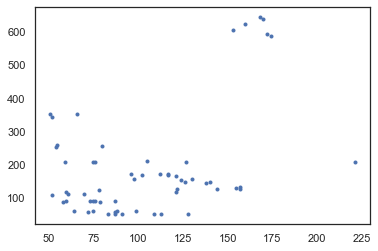

In [59]:
# плотность дорог

x = work_most[work_most.accident > 50].accident
y = work_most[work_most.accident > 50].super_road_density

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

In [ ]:
# плотность населения

x = work_most[work_most.accident > 50].accident
y = work_most[work_most.accident > 50].population_density

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

In [ ]:
# количество авто

x = work_most[work_most.accident > 50].accident
y = work_most[work_most.accident > 50].auto_number

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

#### Лоси

In [ ]:
# плотность населения

x = elks[elks.accident > 50].accident
y = elks[elks.accident > 50].population_density

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.6182170014202473


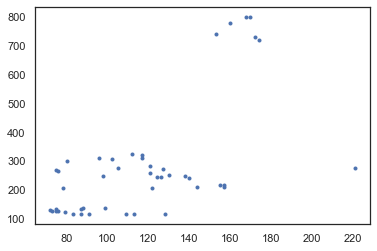

In [68]:
# плотность дорог

x = elks[elks.accident > 70].accident
y = elks[elks.accident > 70].highway_density

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

Коэффициент корреляции Пирсона: 0.4897747297660273


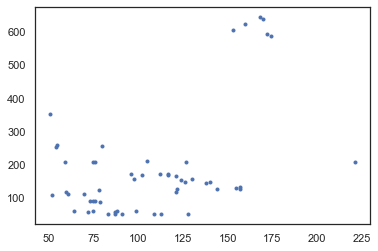

In [67]:
# плотность дорог

x = elks[elks.accident > 50].accident
y = elks[elks.accident > 50].super_road_density

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

In [ ]:
# количество автомобилей

x = elks[elks.accident > 50].accident
y = elks[elks.accident > 50].auto_number

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

In [ ]:
coef, p = stats.spearmanr(x, y)
print('Spearmans correlation coefficient: %.3f' % coef)

coef, p = stats.kendalltau(x, y)
print('Kendall correlation coefficient: %.3f' % coef)

## dtp-stat

In [69]:
work_dtp = pd.read_excel('C:/00_Projects/RIA/2022/02_elk_accidents/dtp_stat.xlsx', sheet_name='data')

In [74]:
work_dtp[work_dtp.role == 'Водитель'].dead_count.value_counts()

0    1749
1     174
2      23
3       3
4       3
Name: dead_count, dtype: int64

In [71]:
work_dtp[(work_dtp.role == 'Водитель') &
         (work_dtp.violations == 'none')].shape

(426, 23)

In [73]:
work_dtp.columns

Index(['category', 'federal_district', 'region', 'district', 'address',
       'location', 'datetime', 'day_period', 'weather', 'auto_type',
       'severity', 'participants_count', 'dead_count', 'injured_count',
       'other_participants', 'role', 'years_of_driving_experience',
       'violations', 'health_status', 'coordinates', 'type_coordinates',
       'accident_id', 'accident_type'],
      dtype='object')

In [ ]:
(work_dtp.groupby(['region', ])

In [ ]:
dead_count

In [ ]:
round(426 / 1952, 2)

In [ ]:
round(203 / 1952, 2)

In [ ]:
680 / 1952

In [ ]:
list_violations = work_dtp[work_dtp.role == 'Водитель'].violations.to_list()

In [ ]:
list_violations = list(set(list_violations))

In [ ]:
new_list_violations = []

for item in list_violations[1:]:
    new_list_violations += item.split(';')

In [ ]:
new_list_violations = list(set(new_list_violations))

In [ ]:
len(new_list_violations)

In [ ]:
new_list_violations